Discrete GM for Variational time integraors by Ari Stern & Mathieu Desbrun

问题1：如何对问题进行隐式求解? A:可以借鉴Lie group VI的文章

In [70]:
import numpy as np
from sympy import *
#from scipy.optimize import *
import pylab as pl

#analytical solution
def Lagrangian(q,v):
    #if single pendulum 
    m=1
    l=1
    g=9
    return m*v**2/2-m*l*g*cos(q)
a=Lagrangian(4,1) 
print(Lagrangian(4,1))
#total time step
    #N
#initailization of the matrix
N=10
q,k,h,alpha,v,x,y=symbols('q k h alpha v x y')
#q=zeros(N+1,1)
#initial condition
 # q[0] and v
def DiscreteLagrangian(q,k,h,alpha):
#alpha is the coefficient before step
    Ld=Lagrangian((1-alpha)*q(k)+alpha*q(k+1),(q(k+1)-q(k))/h)
    return h*Ld
#print(diff())
#discrete E-L equation
#DiscreteLagrangian(q,2,1,0.5)    
   # q[k+1]-q[k]=h[k]*v[k+1]
def DEL(q,k):
    return diff(DiscreteLagrangian(q,k,h,0.5),q(k))-diff(DiscreteLagrangian(q,k-1,h,0.5),q(k))
print(DEL(q,k)) 
print(Lagrangian(q,v))
solve(DEL(q,k)==0)


0.5 - 9*cos(4)
-h*(4.5*sin(0.5*q(k) + 0.5*q(k - 1)) + (2*q(k) - 2*q(k - 1))/(2*h**2)) + h*(4.5*sin(0.5*q(k) + 0.5*q(k + 1)) + (2*q(k) - 2*q(k + 1))/(2*h**2))
v**2/2 - 9*cos(q)


False

对三种数值方法的试验：

In [ ]:
#explicit Euler method
qq=np.zeros((11,1))
vv=np.zeros((11,1))
print(qq)
qq[0]=1
vv[0]=2
N=10
g=9.8
h=0.5
l=1
for k in range(0,N):
    qq[k+1]=qq[k]+h*vv[k]
    vv[k+1]=vv[k]-h*g/l*sin(qq[k])
pylab.plot(qq,vv)
pylab.show()

In [77]:
help(fsolve)

Help on function fsolve in module scipy.optimize.minpack:

fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
    Find the roots of a function.
    
    Return the roots of the (non-linear) equations defined by
    ``func(x) = 0`` given a starting estimate.
    
    Parameters
    ----------
    func : callable ``f(x, *args)``
        A function that takes at least one (possibly vector) argument.
    x0 : ndarray
        The starting estimate for the roots of ``func(x) = 0``.
    args : tuple, optional
        Any extra arguments to `func`.
    fprime : callable(x), optional
        A function to compute the Jacobian of `func` with derivatives
        across the rows. By default, the Jacobian will be estimated.
    full_output : bool, optional
        If True, return optional outputs.
    col_deriv : bool, optional
        Specify whether the Jacobian function computes derivatives down
        th

In [76]:
#implicit Euler method
def myFunction(a, b):
    g=9.8
    h=0.5
    l=1
    F = zeros((2),(1))
    F[0] = -x+a+h*y
    F[1] = -y+b-h*g/l*sin(x)
    return F

N=10
qq=np.zeros((N+1,1))
vv=np.zeros((N+1,1))
qq[0]=1
vv[0]=2
print(myFunction(1,2))
plot(fsolve(myFunction(1,2),[1,1]))
def newtonRaphson(equation, initialGuess, noIteration):
    #equation(initialGuss)-equationDirevative+step
    nextGuess=nextGuess-
    #Jacobian(equation,point,step)
    Jacobian[i,j}=equation(point+step*e[j])[]-feuqation
    #计算残值
    residual=equation(guess)
    guess=residual/diff(euation(guess),guess)+guess
             diff(equation(guess))=equation(guess+h)-equation(guess)
def Gradient(function):
    #变量个数 n
    
pylab.plot(qq,vv)
pylab.show()

Matrix([[-x + 0.5*y + 1], [-y - 4.9*sin(x) + 2]])


TypeError: 'MutableDenseMatrix' object is not callable

In [ ]:

##for k in range(0, N):
    zGuess = ones(2, 1)
    a=1
    b=2
    print(myFunction(a, b))
    print(newton(myFunction(qq[k],vv[k]),zGuess))

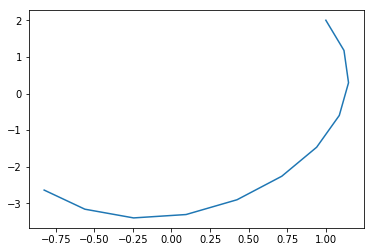

In [66]:
#symplectic Euler method
N=10
qq=zeros(N+1,1)
vv=zeros(N+1,1)
qq[0]=1
vv[0]=2
g=9.8
h=0.1
l=1
for k in range(0,N):
    vv[k+1]=vv[k]-h*g/l*sin(qq[k])
    qq[k+1]=qq[k]+h*vv[k+1]
pylab.plot(qq,vv)
pylab.show()

In [ ]:
#symplectic Euler method
N=20
qq=zeros(N+1,1)
vv=zeros(N+1,1)
qq[0]=1
vv[0]=2
g=9.8
h=0.1
l=1
for k in range(0,N):
    vv[k+1]=vv[k]-h*g/l*sin(qq[k])
    qq[k+1]=qq[k]+h*vv[k+1]
pylab.plot(qq,vv)
pylab.show()

隐式方程如何求解？
在相空间的升级法则？

In [ ]:
p_k=diff(DiscreteLagrangian(q,k,h,alpha),q(k))
print(p_k)

增加耗散项